In [1]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import matplotlib.ticker as mticker

In [2]:
r2 = 0.7
f2 = r2/(1-r2)
f = np.sqrt(f2)
df1 = 1595  # number of constraints in hypothesis test
df2 = smp.FTestPower().solve_power(effect_size=f, alpha=0.05, power=0.8,
                                   df_denom=df1)
ncc = 1  # default
nobs = np.round(df2 + df1 + ncc)

/home/ali/anaconda3/envs/pdradenv/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
rois = np.linspace(0,5)
for r in rois:
    df2 = smp.FTestPower().solve_power(effect_size=f, alpha=0.05, power=0.8,
                                   df_denom=df1)
    ncc = 1  # default
    nobs = np.round(df2 + df1 + ncc)

<function matplotlib.pyplot.show(*args, **kw)>

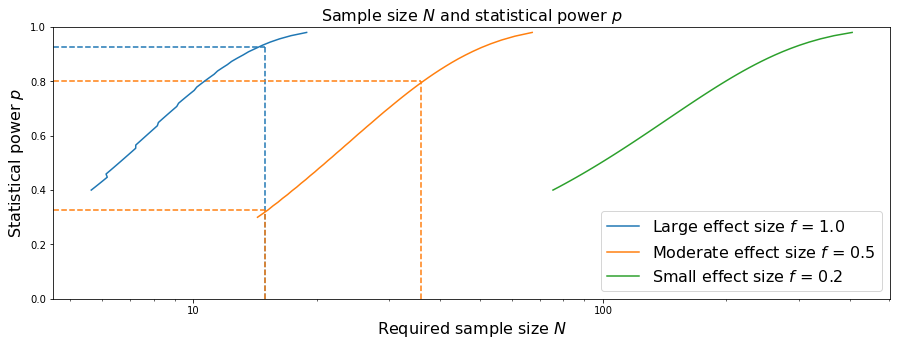

In [59]:
fs = 16
Nc = np.zeros((len(np.linspace(0.4,0.98)),1))
c = 0
plt.rcParams['figure.figsize'] = [15, 5] 
fig,ax = plt.subplots(1,1)
verbose = 0
for p in np.linspace(0.4,0.98):
    # Initial calculation using Cohen's effect size
    N = pg.power_ttest(d=1, power=p,contrast='paired',alternative='two-sided')
    # Correction to Hedge's effect size
    D = pg.convert_effsize(1, 'cohen', 'hedges', nx=np.round(N), ny=np.round(N))
    # Recompute the sample size using Hedge's effect size
    # Assume longitudinal paired study, with no assumptions on the observed change sign
    Nc[c] = pg.power_ttest(d=D, power=p,contrast='paired',alternative='two-sided')
    if verbose == 1:
        print('Requiring sample size',Nc[c],'for statistical power',p)
    c=c+1
# Plot results for large effect size
ax.plot(Nc,np.linspace(0.4,0.98),label='Large effect size $f$ = 1.0')
plt.show

c = 0
Nc = np.zeros((len(np.linspace(0.4,0.98)),1))
for p in np.linspace(0.4,0.98):
    # Initial calculation using Cohen's effect size
    N = pg.power_ttest(d=0.5, power=p,contrast='paired',alternative='two-sided')
    # Correction to Hedge's effect size
    D = pg.convert_effsize(0.5, 'cohen', 'hedges', nx=np.round(N), ny=np.round(N))
    # Recompute the sample size using Hedge's effect size
    # Assume longitudinal paired study, with no assumptions on the observed change sign
    Nc[c] = pg.power_ttest(d=D, power=p, contrast='paired',alternative='two-sided')
    if verbose == 1:
        print('Requiring sample size',Nc[c],'for statistical power',p)
    c = c+1
# Plot results for moderate effect size
ax.plot(Nc,np.linspace(0.3,0.98),label='Moderate effect size $f$ = 0.5')
plt.show

c = 0
Nc = np.zeros((len(np.linspace(0.4,0.98)),1))
for p in np.linspace(0.4,0.98):
    # Initial calculation using Cohen's effect size
    N = pg.power_ttest(d=0.2, power=p, contrast='paired',alternative='two-sided')
    # Correction to Hedge's effect size
    D = pg.convert_effsize(0.2, 'cohen', 'hedges', nx=np.round(N), ny=np.round(N))
    # Recompute the sample size using Hedge's effect size
    # Assume longitudinal paired study, with no assumptions on the observed change sign
    Nc[c] = pg.power_ttest(d=D, power=p, contrast='paired',alternative='two-sided')
    if verbose == 1:
        print('Requiring sample size',Nc[c],'for statistical power',p)
    c = c+1
# Plot results for small effect size
ax.plot(Nc,np.linspace(0.4,0.98),label='Small effect size $f$ = 0.2')
# Label, convert to log scale
ax.set_title('Sample size $N$ and statistical power $p$',fontsize=fs)
ax.set_xlabel('Required sample size $N$',fontsize=fs)
ax.set_ylabel('Statistical power $p$',fontsize=fs)
plt.xscale('log')
plt.ylim(0,1)
ax.legend(fontsize=fs)
ax.hlines(y=0.9275, xmin=0, xmax=15, color='tab:blue', linestyle='--') 
ax.vlines(x=15,  ymin=0, ymax=0.9275, color='tab:blue', linestyle='--') 
ax.hlines(y=0.8, xmin=0, xmax=36, color='tab:orange', linestyle='--') 
ax.vlines(x=36,  ymin=0, ymax=0.8, color='tab:orange', linestyle='--') 
ax.hlines(y=0.325, xmin=0, xmax=15, color='tab:orange', linestyle='--') 
ax.vlines(x=15,  ymin=0, ymax=0.325, color='tab:orange', linestyle='--') 

ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')
plt.show
